## Employee salary negotiations while hiring Predictive Statistics-Linear Regression Analysis.
## Company wants to predict possible salary for offer letter generation
* Target Variable is 'MonthlyIncome'

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_excel(r'C:\Users\Asus\2019_Project\hr_dataset.xlsx')

In [3]:
df.head()

Age  Gender                JobRole EducationField  NumCompaniesWorked  \
0   23  Female        Sales Executive  Life Sciences                   8   
1   51    Male     Research Scientist  Life Sciences                   1   
2   34    Male  Laboratory Technician          Other                   6   
3   20  Female     Research Scientist  Life Sciences                   1   
4   56    Male  Laboratory Technician        Medical                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  
0                  5              0               1           5993  
1                  7              0               1           5130  
2                  0              0               0           2090  
3                  0              0               0           2909  
4                  2              0               0           3468

In [4]:
df.shape

(1470, 9)

In [5]:
df.describe()

Age  NumCompaniesWorked  YearsOfExperience  Communication  \
count  1470.000000         1470.000000        1470.000000    1470.000000   
mean     38.433333            2.693197           4.095238       0.291156   
std      11.451647            2.498009           3.511206       0.454450   
min      19.000000            0.000000           0.000000       0.000000   
25%      28.000000            1.000000           2.000000       0.000000   
50%      38.000000            2.000000           3.000000       0.000000   
75%      49.000000            4.000000           7.000000       1.000000   
max      58.000000            9.000000          17.000000       1.000000   

       Certifications  MonthlyIncome  
count     1470.000000    1470.000000  
mean         0.630612    6502.931293  
std          0.482803    4707.956783  
min          0.000000    1009.000000  
25%          0.000000    2911.000000  
50%          1.000000    4919.000000  
75%          1.000000    8379.000000  
max          1.000000   19999.000000

In [6]:
df.isnull().sum(axis = 0)

Age                   0
Gender                0
JobRole               0
EducationField        0
NumCompaniesWorked    0
YearsOfExperience     0
Communication         0
Certifications        0
MonthlyIncome         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Age                   1470 non-null int64
Gender                1470 non-null object
JobRole               1470 non-null object
EducationField        1470 non-null object
NumCompaniesWorked    1470 non-null int64
YearsOfExperience     1470 non-null int64
Communication         1470 non-null int64
Certifications        1470 non-null int64
MonthlyIncome         1470 non-null int64
dtypes: int64(6), object(3)
memory usage: 103.5+ KB


## Data Preprocessing
* Assign Lables to categorical data

In [8]:
df.Gender=(LabelEncoder().fit_transform(df.Gender))
df.JobRole=(LabelEncoder().fit_transform(df.JobRole))
df.EducationField=(LabelEncoder().fit_transform(df.EducationField))

## checking the Outlier in dataset

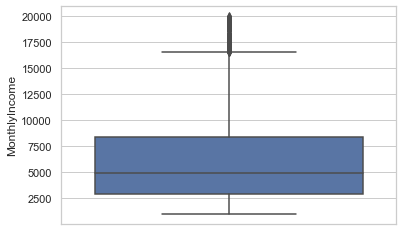

In [9]:
sns.boxplot(y='MonthlyIncome',data=df)

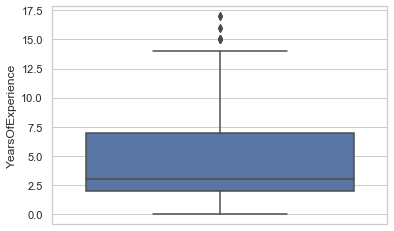

In [10]:
sns.boxplot(y='YearsOfExperience',data=df)

* Dataset has a outlier has we can see in BoxPlot

## Exploratory Data Analysis

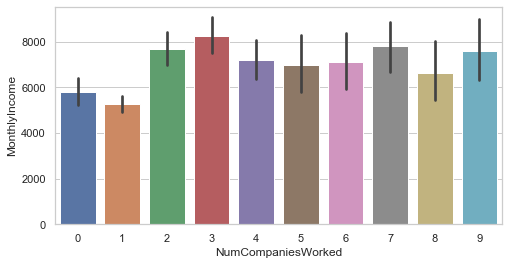

In [11]:
plt.figure(figsize = (8,4))
sns.barplot(x='NumCompaniesWorked', y='MonthlyIncome', data=df)

* Has we can see the employee with 0 and 1 'NumCompaniesWorked' has a low 'MonthlyIncome', rest has a higher 'MonthlyIncome'.

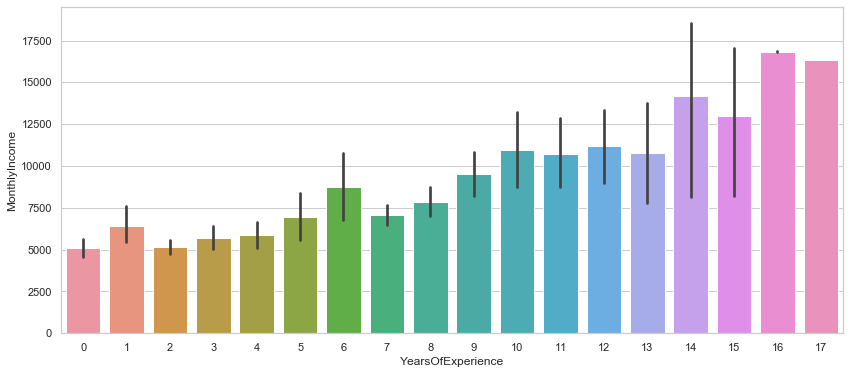

In [12]:
plt.figure(figsize = (14,6))
sns.barplot(x='YearsOfExperience', y='MonthlyIncome', data=df)

* Here we can notice a trend as 'totalworkingyears' increase 'monthlyincome' increases. It is positive related.

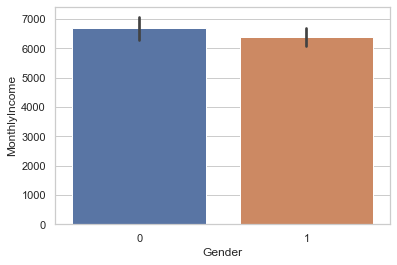

In [13]:
sns.barplot(x='Gender', y='MonthlyIncome', data=df)

* There is no difference in salary of Male and Female. 'MonthlyIncome' is not depend on 'Gender'.

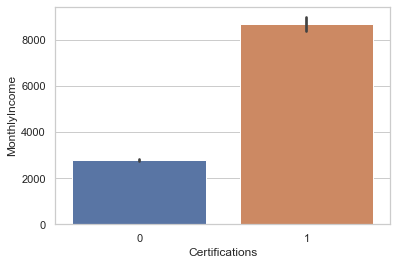

In [14]:
sns.barplot(x='Certifications', y='MonthlyIncome', data=df)
# 0 represent No Professional Certifications and 1 represent they did Professional Certifications.

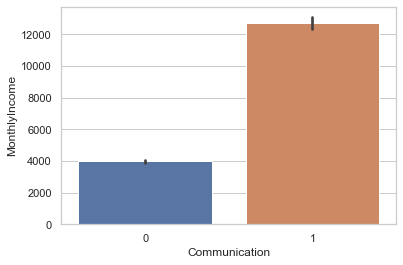

In [15]:
sns.barplot(x='Communication', y='MonthlyIncome', data=df)
# 0 represent they are not good in Communication and 1 represent they are good in Communication

In [16]:
df.head()

Age  Gender  JobRole  EducationField  NumCompaniesWorked  \
0   23       0        7               1                   8   
1   51       1        6               1                   1   
2   34       1        2               4                   6   
3   20       0        6               1                   1   
4   56       1        2               3                   9   

   YearsOfExperience  Communication  Certifications  MonthlyIncome  
0                  5              0               1           5993  
1                  7              0               1           5130  
2                  0              0               0           2090  
3                  0              0               0           2909  
4                  2              0               0           3468

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Age                   1470 non-null int64
Gender                1470 non-null int32
JobRole               1470 non-null int32
EducationField        1470 non-null int32
NumCompaniesWorked    1470 non-null int64
YearsOfExperience     1470 non-null int64
Communication         1470 non-null int64
Certifications        1470 non-null int64
MonthlyIncome         1470 non-null int64
dtypes: int32(3), int64(6)
memory usage: 86.3 KB


## Removing Outlier

In [18]:
q1=df['MonthlyIncome'].quantile(0.25)
q3=df['MonthlyIncome'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
low,high

(-5291.0, 16581.0)

In [19]:
# np.where statement is used instead of "if-else"
df['MonthlyIncome']=np.where(df['MonthlyIncome'] > high,high,df['MonthlyIncome']) #upper limit
df['MonthlyIncome']=np.where(df['MonthlyIncome'] < low,low,df['MonthlyIncome']) #lower limit

In [20]:
q1=df['YearsOfExperience'].quantile(0.25)
q3=df['YearsOfExperience'].quantile(0.75)
iqr=q3-q1 #Inter Quartile Range
low  = q1-1.5*iqr
high = q3+1.5*iqr
low,high

(-5.5, 14.5)

In [21]:
# np.where statement is used instead of "if-else"
df['YearsOfExperience']=np.where(df['YearsOfExperience'] > high,high,df['YearsOfExperience']) #upper limit
df['YearsOfExperience']=np.where(df['YearsOfExperience'] < low,low,df['YearsOfExperience']) #lower limit

In [22]:
df.describe()

Age       Gender      JobRole  EducationField  \
count  1470.000000  1470.000000  1470.000000     1470.000000   
mean     38.433333     0.600000     4.458503        2.247619   
std      11.451647     0.490065     2.461821        1.331369   
min      19.000000     0.000000     0.000000        0.000000   
25%      28.000000     0.000000     2.000000        1.000000   
50%      38.000000     1.000000     5.000000        2.000000   
75%      49.000000     1.000000     7.000000        3.000000   
max      58.000000     1.000000     8.000000        5.000000   

       NumCompaniesWorked  YearsOfExperience  Communication  Certifications  \
count         1470.000000        1470.000000    1470.000000     1470.000000   
mean             2.693197           4.087415       0.291156        0.630612   
std              2.498009           3.486092       0.454450        0.482803   
min              0.000000           0.000000       0.000000        0.000000   
25%              1.000000           2.000000       0.000000        0.000000   
50%              2.000000           3.000000       0.000000        1.000000   
75%              4.000000           7.000000       1.000000        1.000000   
max              9.000000          14.500000       1.000000        1.000000   

       MonthlyIncome  
count    1470.000000  
mean     6361.891837  
std      4353.345470  
min      1009.000000  
25%      2911.000000  
50%      4919.000000  
75%      8379.000000  
max     16581.000000

## Data Partition

In [23]:
x = df.drop('MonthlyIncome',axis=1)
y = df[['MonthlyIncome']]
# split x and y into x_
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=100)

## Model Building

### Correlation Matrix

In [24]:
df = pd.concat([y_train,x_train], axis=1)

MonthlyIncome       Age    Gender   JobRole  \
MonthlyIncome            1.000000 -0.004711 -0.054340 -0.085725   
Age                     -0.004711  1.000000  0.027640  0.078237   
Gender                  -0.054340  0.027640  1.000000 -0.037905   
JobRole                 -0.085725  0.078237 -0.037905  1.000000   
EducationField          -0.047366  0.005658 -0.017206  0.032034   
NumCompaniesWorked       0.130785 -0.019772 -0.059285 -0.048059   
YearsOfExperience        0.356609  0.021083 -0.017493 -0.027229   
Communication            0.862308 -0.006636 -0.040979 -0.056377   
Certifications           0.631656  0.009536 -0.062009 -0.028588   

                    EducationField  NumCompaniesWorked  YearsOfExperience  \
MonthlyIncome            -0.047366            0.130785           0.356609   
Age                       0.005658           -0.019772           0.021083   
Gender                   -0.017206           -0.059285          -0.017493   
JobRole                   0.032034           -0.048059          -0.027229   
EducationField            1.000000           -0.012484          -0.001283   
NumCompaniesWorked       -0.012484            1.000000          -0.104379   
YearsOfExperience        -0.001283           -0.104379           1.000000   
Communication            -0.034168            0.088197           0.289310   
Certifications           -0.065564            0.130801           0.365044   

                    Communication  Certifications  
MonthlyIncome            0.862308        0.631656  
Age                     -0.006636        0.009536  
Gender                  -0.040979       -0.062009  
JobRole                 -0.056377       -0.028588  
EducationField          -0.034168       -0.065564  
NumCompaniesWorked       0.088197        0.130801  
YearsOfExperience        0.289310        0.365044  
Communication            1.000000        0.495777  
Certifications           0.495777        1.000000

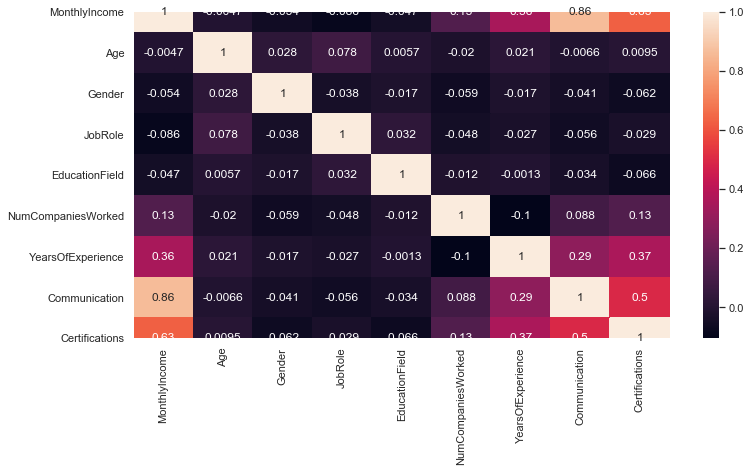

In [25]:
# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
plt.figure(figsize = (12,6))
# plot the correlation heatmap
sns.heatmap(corr,annot = True)

## Multicolinearity (with the help of VIF)

In [26]:
df_before = df
# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
x1 = sm.add_constant(df_before)
series_before = pd.Series([variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])], index=x1.columns)
series_before

C:\Users\Asus\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                 25.301808
MonthlyIncome          5.111925
Age                    1.008023
Gender                 1.010173
JobRole                1.020674
EducationField         1.006447
NumCompaniesWorked     1.061863
YearsOfExperience      1.231386
Communication          3.976249
Certifications         1.777278
dtype: float64

## Model Building

In [27]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1361 to 792
Data columns (total 8 columns):
Age                   1176 non-null int64
Gender                1176 non-null int32
JobRole               1176 non-null int32
EducationField        1176 non-null int32
NumCompaniesWorked    1176 non-null int64
YearsOfExperience     1176 non-null float64
Communication         1176 non-null int64
Certifications        1176 non-null int64
dtypes: float64(1), int32(3), int64(4)
memory usage: 68.9 KB


## Model 1

In [28]:
# Define our input
x2 = sm.add_constant(x_train)
# create a OLS model
model1 = sm.OLS(y_train, x2).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     599.8
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:08:50   Log-Likelihood:                -10563.
No. Observations:                1176   AIC:                         2.114e+04
Df Residuals:                    1167   BIC:                         2.119e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2806.1487    271

## Removing the insignificant variable
## Variable will be removed based on P-value (>0.05) one by one

* Removing "Age" with the help of P-value.

In [29]:
x_train = x_train.drop(['Age'], axis=1)

## Model 2

In [30]:
# define our input
x2 = sm.add_constant(x_train)
# create a OLS model
model2 = sm.OLS(y_train, x2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     686.1
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:08:50   Log-Likelihood:                -10563.
No. Observations:                1176   AIC:                         2.114e+04
Df Residuals:                    1168   BIC:                         2.118e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2807.7916    204

## Backward Elimination Method

In [31]:
x = df.drop('MonthlyIncome', axis =1)
y = df['MonthlyIncome']

In [32]:
# Backward Elimination
cols = list(x.columns)   # all column present in x
pmax = 1
while (len(cols)>0):   # count of variable should be greater than zero
    p= []
    x_1 = x[cols]   # all column we are assign in x_1
    x_1 = sm.add_constant(x_1)  # adding a column with value 1
    final_model = sm.OLS(y,x_1).fit()   # Fegression model
    p = pd.Series(final_model.pvalues.values[1:],index = cols)   # to get p-values for all variable only
    pmax = max(p)   # select a max P-value
    feature_with_p_max = p.idxmax()   # idmax is used to display the variable name which has max p-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
            break
selected_features_BE = cols
print(selected_features_BE)

['JobRole', 'NumCompaniesWorked', 'YearsOfExperience', 'Communication', 'Certifications']


In [33]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     961.7
Date:                Sun, 09 Feb 2020   Prob (F-statistic):               0.00
Time:                        19:08:50   Log-Likelihood:                -10564.
No. Observations:                1176   AIC:                         2.114e+04
Df Residuals:                    1170   BIC:                         2.117e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2721.5331    159.548     17.058      0.000    2408.500    3034.566
JobRole              -61.3476     22.957     -2.672      0.008    -106.388     -16.307
NumCompaniesWorked    68.9937     22.827      3.023      0.003      24.208     113.779
YearsOfExperience     78.9446     18.036      4.377      0.000      43.558     114.332
Communication       6879.7817    144.724     47.537      0.000    6595.833    7163.730
Certifications      2226.9897    140.365     15.866      0.000    1951.594    2502.385
==============================================================================
Omnibus:                       30.939   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.788
Skew:                           0.132   Prob(JB):                     3.83e-14
Kurtosis:                       4.091   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Assumption of Model
* Linearity
* Normality
* Homoscedasicity
* Model Error has to be independently identificaly Distributed

## Homoscedasicity

In [34]:
Data = pd.concat([x_train,y_train],axis=1)

In [35]:
Data['Fitted_value'] = final_model.fittedvalues
Data['Residual'] = final_model.resid

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


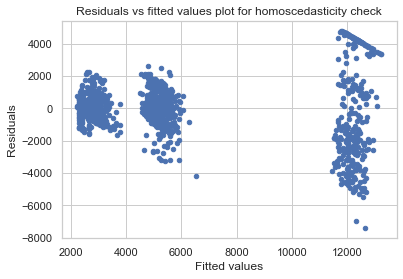

In [36]:
p = Data.plot.scatter(x='Fitted_value', y='Residual')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

 The null hypothesis for Breusch-pagan test is that:

* H0 = variance2i = variance2 (the variances for the errors are equal)


 The alternate hypothesis (the one you are testing), is that:

* H1 = variance2i not equal variance2 (the variance arenot equal)

In [37]:
# Run the Breusch-Pagan test
_, pval2, _, f_pval2 = diag.het_breuschpagan(final_model.resid, final_model.model.exog)
print(pval2, f_pval2)

9.93120891710373e-120 2.80167594426733e-163


## Normality

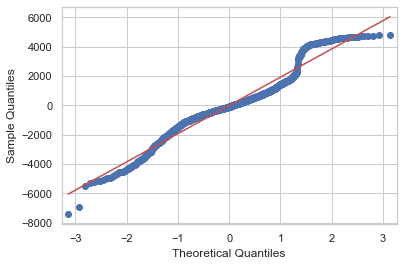

In [38]:
import pylab
# check for the normality of the residuals
sm.qqplot(final_model.resid, line='s')
pylab.show()

In [39]:
# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(final_model.resid)/ len(final_model.resid)
mean_residuals

2.782234004785807e-12

## Model Error are IID

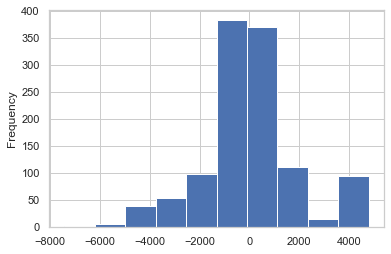

In [40]:
Data['Residual'].plot.hist()

## Prediction on Test Data (unseen data)

In [41]:
x_test2 = x_test[['JobRole', 'NumCompaniesWorked', 'YearsOfExperience', 'Communication', 'Certifications']]

In [42]:
x_test2 = sm.add_constant(x_test2)

In [43]:
x_test2.head()

const  JobRole  NumCompaniesWorked  YearsOfExperience  Communication  \
880     1.0        2                   1                2.0              0   
152     1.0        8                   2                5.0              0   
1466    1.0        0                   4                7.0              1   
1084    1.0        7                   1                6.0              1   
1086    1.0        5                   1                9.0              1   

      Certifications  
880                0  
152                1  
1466               1  
1084               1  
1086               1

In [44]:
y_predict = final_model.predict(x_test2)

In [45]:
test = pd.concat([x_test, y_test], axis=1)

In [46]:
test['predicted'] = y_predict

In [47]:
test.head()

Age  Gender  JobRole  EducationField  NumCompaniesWorked  \
880    43       0        2               4                   1   
152    28       1        8               2                   2   
1466   36       1        0               3                   4   
1084   52       1        7               5                   1   
1086   23       1        5               3                   1   

      YearsOfExperience  Communication  Certifications  MonthlyIncome  \
880                 2.0              0               0         2743.0   
152                 5.0              0               1         2306.0   
1466                7.0              1               1         9991.0   
1084                6.0              1               1         7083.0   
1086                9.0              1               1        14411.0   

         predicted  
880    2825.720748  
152    4990.452158  
1466  12656.891537  
1084  11941.532431  
1086  12301.061591

## Performance on Training Data set

In [48]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(Data['MonthlyIncome'], Data['Fitted_value'])
# calculate the mean absolute error
model_mae = mean_absolute_error(Data['MonthlyIncome'], Data['Fitted_value'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 3.71e+06
MAE 1.36e+03
RMSE 1.93e+03


## Performance on Test data

In [49]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(test['MonthlyIncome'], test['predicted'])
# calculate the mean absolute error
model_mae = mean_absolute_error(test['MonthlyIncome'], test['predicted'])
# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 4.11e+06
MAE 1.44e+03
RMSE 2.03e+03
